In [12]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.cm as cm
%matplotlib inline

# set some global options
#  plt.rcParams.keys()
plt.rcParams['figure.figsize'] = (6.,4)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1

## Path to data directory

In [11]:
### Path to data
path = '/Users/Zoe/Desktop/Research/BodiHoyle/Simulations/3D/'

## yt Slice

yt : [INFO     ] 2017-10-02 14:11:38,838 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2017-10-02 14:11:38,840 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2017-10-02 14:11:38,862 Parameters: current_time              = 1.00027860689
yt : [INFO     ] 2017-10-02 14:11:38,864 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2017-10-02 14:11:38,867 Parameters: domain_left_edge          = [-8. -8. -8.]
yt : [INFO     ] 2017-10-02 14:11:38,868 Parameters: domain_right_edge         = [ 8.  8.  8.]
yt : [INFO     ] 2017-10-02 14:11:38,870 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-10-02 14:11:38,891 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2017-10-02 14:11:38,892 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INF

hla_hdf5_plt_cnt_0001


yt : [INFO     ] 2017-10-02 14:11:40,349 xlim = -8.000000 8.000000
yt : [INFO     ] 2017-10-02 14:11:40,350 ylim = -8.000000 8.000000
yt : [INFO     ] 2017-10-02 14:11:40,353 xlim = -8.000000 8.000000
yt : [INFO     ] 2017-10-02 14:11:40,355 ylim = -8.000000 8.000000
yt : [INFO     ] 2017-10-02 14:11:40,357 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



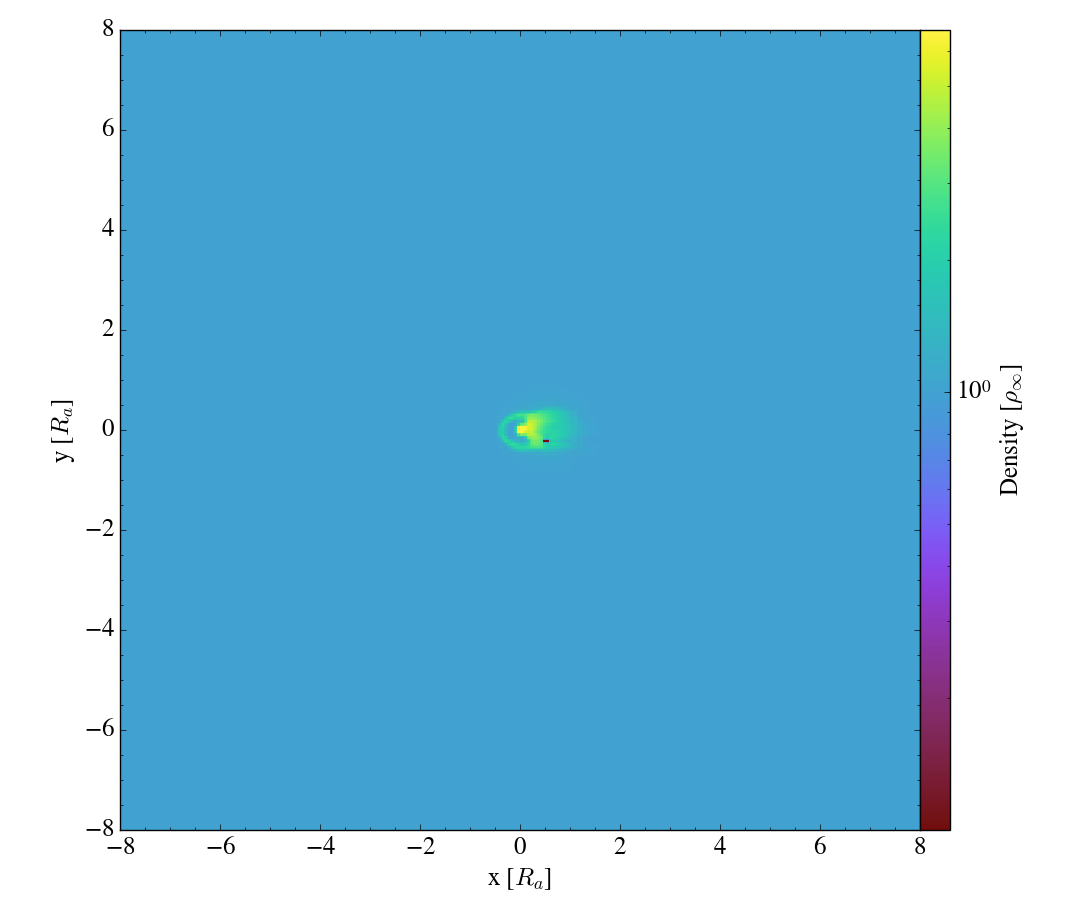

hla_hdf5_plt_cnt_0002


Exception AttributeError: 'grids' in <bound method FLASHHierarchy.__del__ of <yt.frontends.flash.data_structures.FLASHHierarchy object at 0x11e373650>> ignored


ValueError: could not broadcast input array from shape (1273,3) into shape (1321,3)

In [17]:
p1 = yt.load(path+'hla_hdf5_plt_cnt_0001')
p2 = yt.load(path+'hla_hdf5_plt_cnt_0002')



lis = [p1,p2]

fig = plt.figure()

for i, fname in enumerate(lis):
    print fname
    slc = yt.SlicePlot(fname, 'z', 'dens')
    slc.set_xlabel(r'x [$R_a$]')
    slc.set_ylabel(r'y [$R_a$]')
    slc.set_colorbar_label('dens',r'Density [$ \rho_\infty $]')
#    slc.save(path+ 'hla' +str(i)+ '.png')
    
    slc.show()


## mdot

In [6]:
### Read in mdot data
hla = ascii.read(path+'mdot_3d.dat')
# define these without the first entry 
time = hla['time'][1:]
mdot = hla['mdot'][1:]/np.pi   # normalizing to HLA

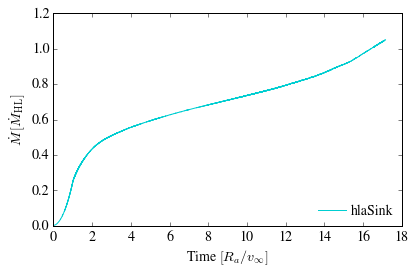

In [7]:
plt.plot(time,mdot,'DarkTurquoise',label='hlaSink')
plt.xlabel(r'Time $[R_a / v_\infty]$')
plt.ylabel(r'$\dot{M} \, [\dot{M}_{\rm HL}]$')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig(path+'mdot_3d.pdf')